###  Scoutium Machine Learning

In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
pd.set_option('display.width', 600)     # Set display width to 600

import warnings 
warnings.simplefilter(action='ignore', category=Warning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")


In [2]:
sc_attributes = pd.read_csv("C:Desktop/scoutium_attributes.csv", sep=';')
sc_potential_labels = pd.read_csv("c:Desktop/scoutium_potential_labels.csv", sep=';')

In [3]:
scoutium = pd.merge(sc_attributes, sc_potential_labels, on = ["task_response_id","match_id","evaluator_id","player_id"])
scoutium.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average


In [4]:
print(scoutium.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10729
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   task_response_id  10730 non-null  int64  
 1   match_id          10730 non-null  int64  
 2   evaluator_id      10730 non-null  int64  
 3   player_id         10730 non-null  int64  
 4   position_id       10730 non-null  int64  
 5   analysis_id       10730 non-null  int64  
 6   attribute_id      10730 non-null  int64  
 7   attribute_value   10730 non-null  float64
 8   potential_label   10730 non-null  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 838.3+ KB
None


In [5]:
scoutium = scoutium[scoutium.position_id != 1]

In [6]:
scoutium["position_id"].value_counts()

2     1972
6     1428
10    1088
8     1020
7      986
3      986
4      884
9      850
5      816
Name: position_id, dtype: int64

In [7]:
scoutium = scoutium[scoutium.potential_label != "below_average"]

In [8]:
scoutium[["potential_label"]].value_counts()

potential_label
average            7922
highlighted        1972
dtype: int64

In [9]:
scoutium_pivot = scoutium.pivot_table(index=["task_response_id", "match_id", "evaluator_id", "player_id", "position_id","potential_label"],
                                      columns="attribute_id",
                                      values="attribute_value")
scoutium_pivot.head()

attribute_id                                                                  4322  4323  4324  4325  4326  4327  4328  4329  4330  4332  ...  4352  4353  4354  4355  4356  4357  4407  4408  4423  4426
task_response_id match_id evaluator_id player_id position_id potential_label                                                              ...                                                            
4915             62935    177676       1361061   2           average          56.0  56.0  67.0  56.0  45.0  56.0  56.0  67.0  45.0  56.0  ...  56.0  56.0  56.0  56.0  67.0  56.0  56.0  67.0  34.0  45.0
                                       1361626   10          highlighted      56.0  67.0  78.0  78.0  56.0  56.0  78.0  67.0  78.0  67.0  ...  67.0  78.0  78.0  67.0  67.0  67.0  78.0  56.0  78.0  67.0
                                       1361858   6           average          45.0  56.0  56.0  56.0  56.0  45.0  56.0  56.0  56.0  56.0  ...  56.0  45.0  56.0  56.0  56.0  56.0  56.0  56.0  45.0  56.0
                                       1362220   5           highlighted      67.0  56.0  56.0  78.0  78.0  78.0  67.0  67.0  67.0  67.0  ...  78.0  67.0  78.0  67.0  67.0  67.0  67.0  56.0  67.0  67.0
                                       1364951   9           highlighted      45.0  56.0  56.0  78.0  78.0  56.0  56.0  45.0  56.0  56.0  ...  67.0  67.0  67.0  67.0  45.0  45.0  67.0  45.0  56.0  56.0

[5 rows x 34 columns]

In [10]:
scoutium_pivot = scoutium.pivot_table(index=["player_id", "position_id", "potential_label"],
                                      columns="attribute_id",
                                      values="attribute_value")
scoutium_pivot.head()

attribute_id                           4322  4323  4324  4325  4326  4327  4328  4329  4330  4332  ...  4352  4353  4354  4355  4356  4357  4407  4408  4423  4426
player_id position_id potential_label                                                              ...                                                            
1355710   7           average          50.5  50.5  34.0  50.5  45.0  45.0  45.0  45.0  50.5  56.0  ...  56.0  34.0  39.5  50.5  34.0  34.0  56.0  34.0  34.0  56.0
1356362   9           average          67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  ...  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0  56.0  78.0
1356375   3           average          67.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  ...  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0  56.0  78.0
          4           average          67.0  78.0  67.0  67.0  67.0  78.0  78.0  78.0  56.0  67.0  ...  78.0  67.0  67.0  67.0  56.0  67.0  56.0  67.0  45.0  56.0
1356411   9           average          67.0  67.0  78.0  78.0  67.0  67.0  67.0  67.0  89.0  78.0  ...  67.0  56.0  67.0  67.0  56.0  67.0  89.0  56.0  67.0  78.0

[5 rows x 34 columns]

In [11]:
scoutium_pivot = scoutium_pivot.reset_index()       # Assign the indexes as variables
scoutium_pivot.columns = scoutium_pivot.columns.astype(str)     # Convert the names of the "attribute_id" columns to strings.

In [12]:
scoutium_pivot.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,average,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,average,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [14]:
le = LabelEncoder()
scoutium_pivot["potential_label"] = le.fit_transform(scoutium_pivot["potential_label"])

In [15]:
num_cols = [col for col in scoutium_pivot.columns if col not in ["player_id","position_id","potential_label"]]
scoutium_pivot_num = scoutium_pivot[num_cols]

In [20]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data in num_cols
scaler.fit(scoutium_pivot[num_cols])

# Transform the data in num_cols
scoutium_pivot[num_cols] = scaler.transform(scoutium_pivot[num_cols])

scoutium_pivot[num_cols].head()


attribute_id,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,-0.542606,-0.559398,-1.404764,-0.437916,-0.766602,-0.794802,-0.907351,-0.791605,-0.446324,-0.122619,...,0.012848,-1.281899,-1.132245,-0.494569,-1.234869,-1.519578,-0.142650,-1.487256,-0.955381,-0.252741
1,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,0.404075,0.727985,0.691171,...,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
2,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,0.727985,0.691171,...,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
3,0.595327,1.307560,0.678677,0.682837,0.722639,1.481795,1.355461,1.001915,-0.054888,0.691171,...,1.560314,0.813645,0.428479,0.631718,0.198319,0.768231,-0.142650,0.668713,-0.275832,-0.252741
4,0.595327,0.560776,1.373158,1.430006,0.722639,0.722929,0.601190,0.404075,2.293730,1.504961,...,0.786581,0.115130,0.428479,0.631718,0.198319,0.768231,1.874292,-0.049944,1.083267,1.041611


In [33]:
X = scoutium_pivot.drop(["potential_label","player_id"], axis = 1)
y = scoutium_pivot["potential_label"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
def base_models(X, y, scoring):
    print("Base Models....")
    classifiers = [("LR", LogisticRegression()),
                  ("KNN", KNeighborsClassifier()),
                  ("SVC",SVC()),
                  ("CART",DecisionTreeClassifier()),
                  ("RF",RandomForestClassifier()),
                  ("Adaboost", AdaBoostClassifier()),
                  ("GBM", GradientBoostingClassifier()),
                  ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss")),
                  ("LightGBM", LGBMClassifier()),
                  ("CatBoost", CatBoostClassifier(verbose = False))]
    
    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv = 3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")
scores = ["roc_auc","f1","precision","recall","accuracy"]

for i in scores:
    base_models(X, y, i)

Base Models....
roc_auc: 0.8177 (LR) 
roc_auc: 0.6914 (KNN) 
roc_auc: 0.8396 (SVC) 
roc_auc: 0.7446 (CART) 
roc_auc: 0.8913 (RF) 
roc_auc: 0.7781 (Adaboost) 
roc_auc: 0.8518 (GBM) 
roc_auc: 0.8441 (XGBoost) 
roc_auc: 0.8588 (LightGBM) 
roc_auc: 0.8924 (CatBoost) 
Base Models....
f1: 0.537 (LR) 
f1: 0.3457 (KNN) 
f1: 0.0351 (SVC) 
f1: 0.5547 (CART) 
f1: 0.5632 (RF) 
f1: 0.5668 (Adaboost) 
f1: 0.6037 (GBM) 
f1: 0.6037 (XGBoost) 
f1: 0.5788 (LightGBM) 
f1: 0.6066 (CatBoost) 
Base Models....
precision: 0.7331 (LR) 
precision: 0.9444 (KNN) 
precision: 0.3333 (SVC) 
precision: 0.53 (CART) 
precision: 0.8546 (RF) 
precision: 0.6335 (Adaboost) 
precision: 0.7092 (GBM) 
precision: 0.6904 (XGBoost) 
precision: 0.6599 (LightGBM) 
precision: 0.8524 (CatBoost) 
Base Models....
recall: 0.4454 (LR) 
recall: 0.2154 (KNN) 
recall: 0.0185 (SVC) 
recall: 0.5195 (CART) 
recall: 0.4444 (RF) 
recall: 0.5341 (Adaboost) 
recall: 0.5175 (GBM) 
recall: 0.5526 (XGBoost) 
recall: 0.5175 (LightGBM) 
recall: 0.4805

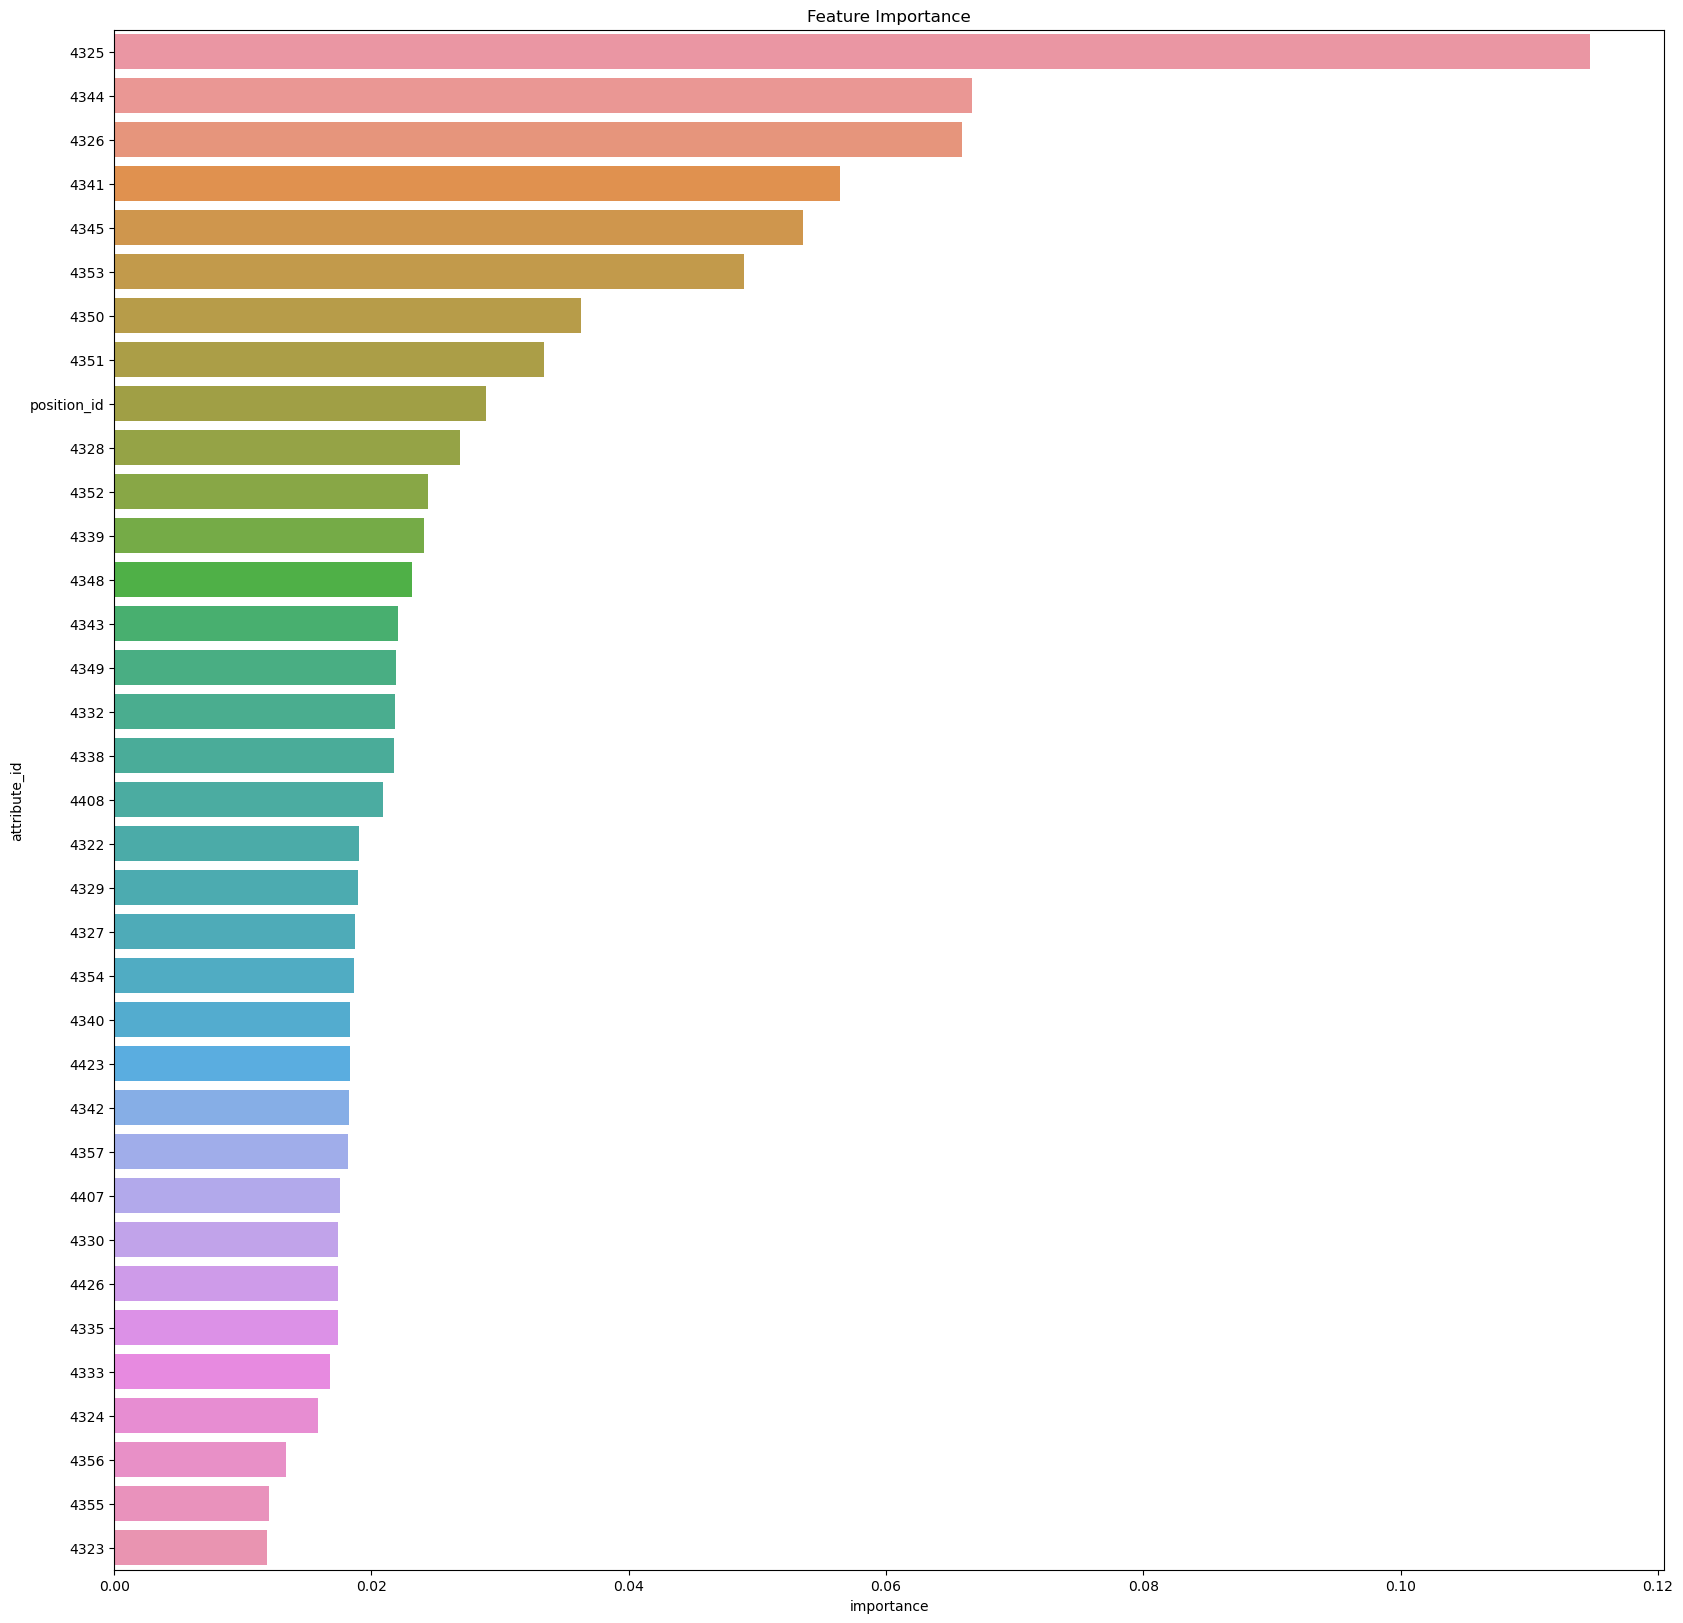

In [39]:
def feature_importance(model, X_train, y_train):
    model.fit(X_train, y_train)
    feature_importance = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["importance"])
    feature_importance.sort_values(by="importance", ascending=False, inplace=True)
    plt.figure(figsize=(20, 20))
    sns.barplot(x=feature_importance.importance, y=feature_importance.index)
    plt.title("Feature Importance")
    plt.show()

feature_importance(RandomForestClassifier(), X_train, y_train)

In [40]:
1382 + 635 + 2286

4303